# 📓 Data Science Homework
Fill in the code blocks and markdown cells as instructed below.

## Descriptive Statistics

In [11]:
# TODO: Load the dataset and compute mean, median, mode, std, IQR
import pandas as pd
import numpy as np
df = pd.read_csv('../data/ACCIDENTS_GU_BCN_2013.csv')
victims = df['N�mero de v�ctimes']
print('Mean:', victims.mean())
print('Median:', victims.median())
print('Mode:', victims.mode().values)  # Returns a Series, .values gives the actual mode(s)
print('Standard Deviation:', victims.std())
iqr = victims.quantile(0.75) - victims.quantile(0.25)
print('IQR (Interquartile Range):', iqr)

Mean: 1.2070424024532094
Median: 1.0
Mode: [1]
Standard Deviation: 0.8005795130298843
IQR (Interquartile Range): 0.0


## Visualizations (Histogram, KDE, Boxplot, Heatmap)

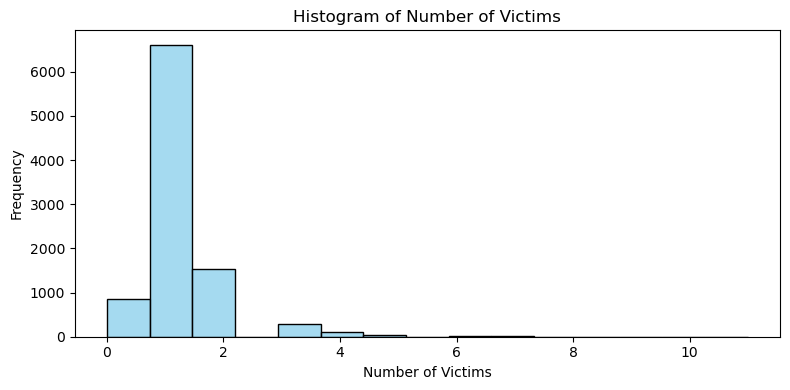

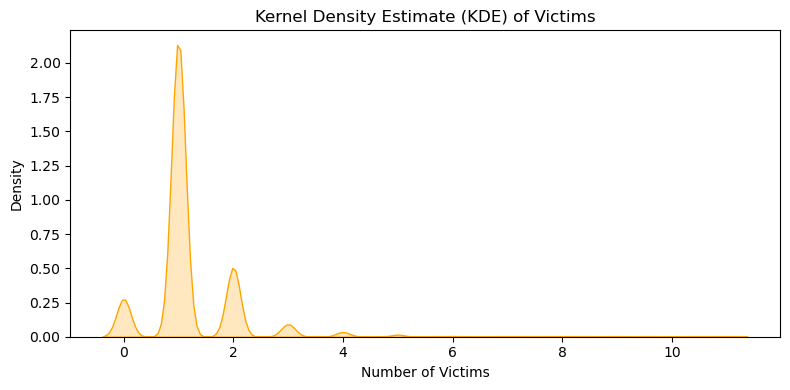

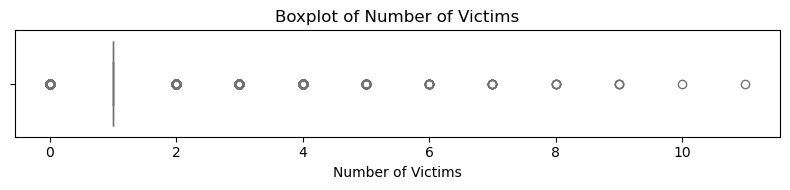

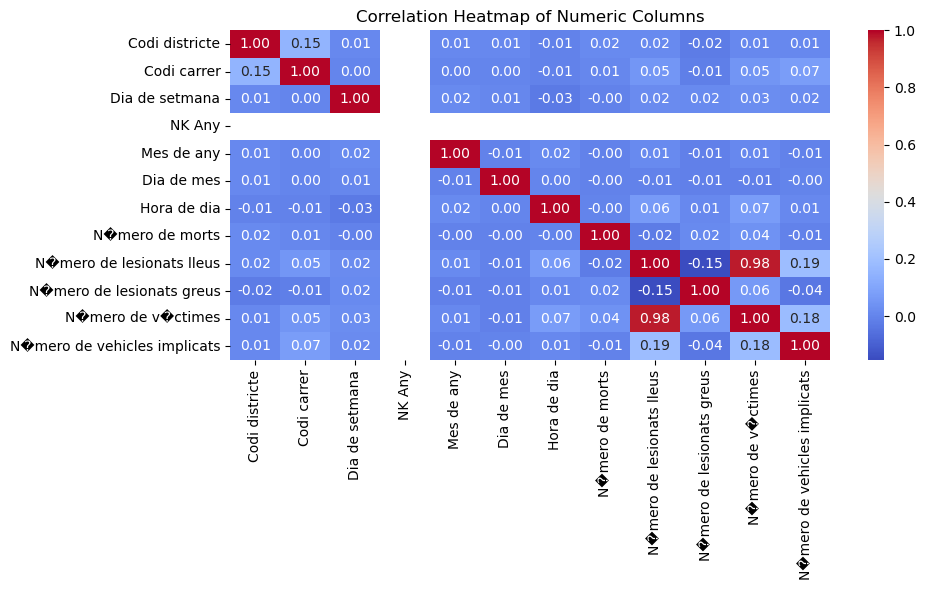

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(victims, bins=15, kde=False, color='skyblue')
plt.title('Histogram of Number of Victims')
plt.xlabel('Number of Victims')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# KDE Plot
plt.figure(figsize=(8, 4))
sns.kdeplot(victims, fill=True, color='orange')
plt.title('Kernel Density Estimate (KDE) of Victims')
plt.xlabel('Number of Victims')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(x=victims, color='lightgreen')
plt.title('Boxplot of Number of Victims')
plt.xlabel('Number of Victims')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

## Bootstrap Confidence Interval

In [13]:
import numpy as np

# Drop any missing values, just in case
victims_clean = victims.dropna()

# Generate 1000 bootstrap sample means
boot_means = [victims_clean.sample(frac=1, replace=True).mean() for _ in range(1000)]

# Calculate the 95% confidence interval
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

# Print the result
print(f'95% Confidence Interval for mean victims: ({ci_lower:.2f}, {ci_upper:.2f})')

95% Confidence Interval for mean victims: (1.19, 1.22)


## Hypothesis Testing

In [14]:
from scipy.stats import ttest_1samp

# Drop missing values from the victims column
victims_clean = victims.dropna()

# Perform the t-test: Is the mean different from 1?
t_stat, p_val = ttest_1samp(victims_clean, popmean=1)

# Output the results
print(f't-statistic: {t_stat:.2f}, p-value: {p_val:.4f}')

# Interpretation
if p_val < 0.05:
    print('✅ Reject null hypothesis: mean is significantly different from 1')
else:
    print('❌ Fail to reject null hypothesis: no significant difference from 1')

t-statistic: 25.15, p-value: 0.0000
✅ Reject null hypothesis: mean is significantly different from 1
